In [1]:
import numpy as np 
from re import A # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron, LogisticRegression


In [2]:
data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")


In [3]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:

print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [5]:
# data['HeartDisease'] = data['HeartDisease'].map({'Presence': 0, 'Absence': 1})
# data.HeartDisease



In [6]:
# scaler = MinMaxScaler()#StandardScaler() 
# data[["Age","BP","Cholesterol","Max HR"]] = scaler.fit_transform(data[["Age","BP","Cholesterol","Max HR"]])

In [7]:
data.head

<bound method NDFrame.head of       Gender        Age    Height      Weight family_history_with_overweight   
0     Female  21.000000  1.620000   64.000000                            yes  \
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC

In [8]:
data.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
data[data.isnull().any(axis=1)].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [10]:
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

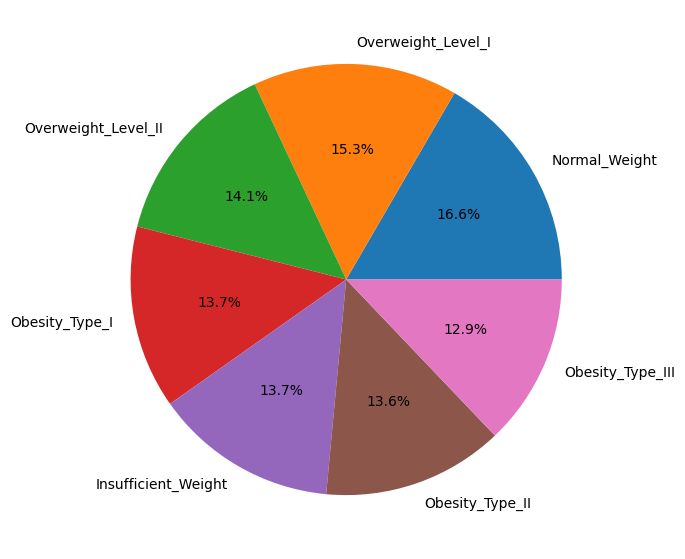

In [11]:

plt.figure(figsize=(20,7))
plt.pie(data['NObeyesdad'].value_counts(), labels=['Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'], autopct='%1.1f%%')
plt.show()

In [12]:
data=data.drop_duplicates()

In [13]:
print(f"data shape: {data.shape}")


data shape: (2087, 17)


In [14]:
data=data.drop_duplicates()

In [16]:

# matrix = data.corr().round(2)
# print(matrix)


In [17]:
data['NObeyesdad'] = data['NObeyesdad'].map({'Normal_Weight' : 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 1, 'Insufficient_Weight': 0, \
 'Obesity_Type_I' : 2  , 'Obesity_Type_II' : 2, \
 'Obesity_Type_III' : 2 })

In [18]:
data['CAEC'] = data['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['SMOKE'] = data['SMOKE'].apply(lambda x: ['yes', 'no'].index(x))
data['SCC'] = data['SCC'].apply(lambda x: ['yes', 'no'].index(x))
data['CALC'] = data['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female': 1})
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'no' : 0, 'yes': 1})
data['FAVC'] = data['FAVC'].map({'no' : 0, 'yes': 1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation': 1, 'Walking':2, 'Automobile':3, 'Motorbike':4, 'Bike':5})
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,1,2.0,1,0.0,1.0,0,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,0,3.0,0,3.0,0.0,1,1,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,1,2.0,1,2.0,1.0,2,1,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,1,2.0,1,2.0,0.0,2,2,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,1,2.0,1,0.0,0.0,1,1,1


In [19]:
data=data.drop_duplicates()

In [20]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,1,2.000000,1,0.000000,1.000000,0,1,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,0,3.000000,0,3.000000,0.000000,1,1,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,1,2.000000,1,2.000000,1.000000,2,1,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,1,2.000000,1,2.000000,0.000000,2,2,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,1,2.000000,1,0.000000,0.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,1,1.728139,1,1.676269,0.906247,1,1,2
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,1,2.005130,1,1.341390,0.599270,1,1,2
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,1,2.054193,1,1.414209,0.646288,1,1,2
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,1,2.852339,1,1.139107,0.586035,1,1,2


In [21]:
y=data["NObeyesdad"]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('NObeyesdad',axis = 1))

StandardScaler()

In [23]:
scaled_features = scaler.transform(data.drop('NObeyesdad',axis = 1))
x_data = pd.DataFrame(scaled_features,columns = data.columns[:-1])
y_data = y

In [24]:
x=data.drop(['NObeyesdad'],axis=1)
y=data["NObeyesdad"].values
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.25, random_state=20,stratify=y_data)

In [25]:
y_data.value_counts()

NObeyesdad
2    972
1    566
0    549
Name: count, dtype: int64

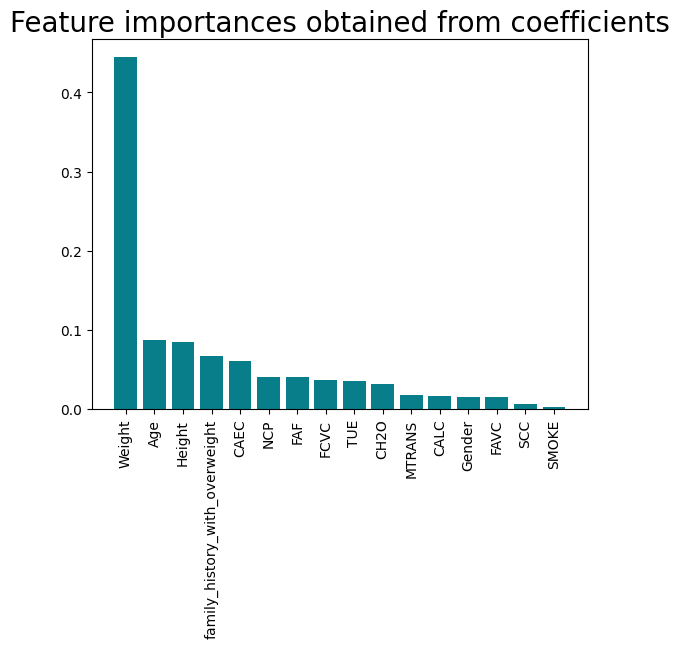

In [26]:
model = RandomForestClassifier()
model.fit(x_train_data, y_train_data)

# Importance rankings
importances = pd.DataFrame(data={
    'Attribute': x_train_data.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

 # KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_data,y_train_data)
    pred_i = knn.predict(x_test_data)
    error_rate.append(np.mean(pred_i != y_test_data))
    print(i,np.mean(pred_i != y_test_data))

1 0.11302681992337164
2 0.11494252873563218
3 0.11877394636015326
4 0.11877394636015326
5 0.12643678160919541
6 0.13026819923371646
7 0.12835249042145594
8 0.13409961685823754
9 0.1360153256704981
10 0.12452107279693486
11 0.1417624521072797
12 0.13409961685823754
13 0.14367816091954022
14 0.14367816091954022
15 0.1475095785440613
16 0.14942528735632185
17 0.15134099616858238
18 0.15517241379310345
19 0.1532567049808429
20 0.1532567049808429
21 0.15708812260536398
22 0.16091954022988506
23 0.16283524904214558
24 0.16666666666666666
25 0.16666666666666666
26 0.17049808429118773
27 0.16666666666666666
28 0.17049808429118773
29 0.17049808429118773
30 0.1724137931034483
31 0.1724137931034483
32 0.17049808429118773
33 0.17624521072796934
34 0.1743295019157088
35 0.18007662835249041
36 0.18007662835249041
37 0.18582375478927204
38 0.18007662835249041
39 0.18582375478927204


Text(0, 0.5, 'Error Rate')

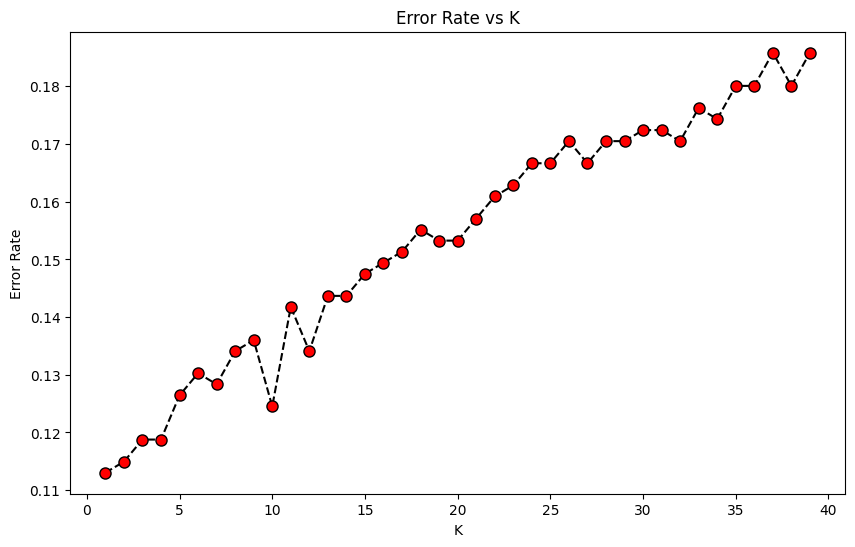

In [29]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train_data, y_train_data)
y_pred = classifier.predict(x_test_data)
from sklearn.metrics import classification_report

print(classification_report(y_test_data, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       137
           1       0.79      0.82      0.81       142
           2       0.91      0.96      0.94       243

    accuracy                           0.88       522
   macro avg       0.87      0.85      0.86       522
weighted avg       0.88      0.88      0.87       522



>2, train: 0.656, test: 0.655
>3, train: 0.831, test: 0.826
>4, train: 0.831, test: 0.826
>5, train: 0.888, test: 0.879
>6, train: 0.921, test: 0.916
>7, train: 0.921, test: 0.916
>8, train: 0.941, test: 0.935
>9, train: 0.945, test: 0.933
>10, train: 0.945, test: 0.933
>11, train: 0.958, test: 0.950
>12, train: 0.958, test: 0.950
>13, train: 0.963, test: 0.964
>14, train: 0.963, test: 0.964
>15, train: 0.971, test: 0.971
>16, train: 0.972, test: 0.975
>17, train: 0.972, test: 0.975
>18, train: 0.972, test: 0.975
>19, train: 0.972, test: 0.975
>20, train: 0.972, test: 0.975
>21, train: 0.973, test: 0.966
>22, train: 0.973, test: 0.966
>23, train: 0.973, test: 0.966
>24, train: 0.973, test: 0.966
>25, train: 0.973, test: 0.966
>26, train: 0.973, test: 0.966
>27, train: 0.973, test: 0.966
>28, train: 0.973, test: 0.966
>29, train: 0.973, test: 0.966
>30, train: 0.973, test: 0.966
>31, train: 0.973, test: 0.966
>32, train: 0.973, test: 0.966
>33, train: 0.973, test: 0.966
>34, train: 0.97

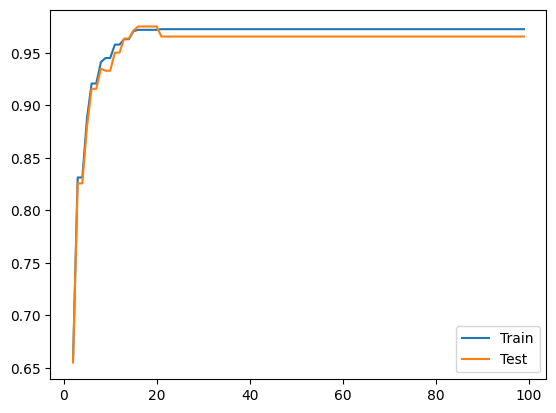

In [31]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 100)]

for i in values:
	
	modell = DecisionTreeClassifier( max_leaf_nodes = i, min_samples_leaf = 6, max_depth= 6,random_state=42)
	modell.fit(x_train_data, y_train_data)

	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

In [32]:
# model = LogisticRegression(max_iter=200)
# model.fit(x_train, y_train)
# print(f"train score : {model.score(x_train, y_train)}")
# print(f"test score : {model.score(X_test, y_test)}")

In [33]:
from sklearn.ensemble import RandomForestClassifier

>2, train: 0.960, test: 0.885,i 2.000 
>3, train: 0.983, test: 0.898,i 3.000 
>4, train: 0.990, test: 0.954,i 4.000 
>5, train: 0.996, test: 0.969,i 5.000 
>6, train: 0.998, test: 0.952,i 6.000 
>7, train: 0.997, test: 0.958,i 7.000 
>8, train: 0.998, test: 0.956,i 8.000 
>9, train: 0.998, test: 0.964,i 9.000 
>10, train: 0.997, test: 0.956,i 10.000 
>11, train: 0.999, test: 0.960,i 11.000 
>12, train: 0.999, test: 0.966,i 12.000 
>13, train: 1.000, test: 0.960,i 13.000 
>14, train: 0.998, test: 0.971,i 14.000 
>15, train: 0.999, test: 0.975,i 15.000 
>16, train: 1.000, test: 0.967,i 16.000 
>17, train: 1.000, test: 0.964,i 17.000 
>18, train: 1.000, test: 0.969,i 18.000 
>19, train: 1.000, test: 0.977,i 19.000 
>20, train: 1.000, test: 0.969,i 20.000 
>21, train: 0.999, test: 0.958,i 21.000 
>22, train: 1.000, test: 0.973,i 22.000 
>23, train: 0.999, test: 0.969,i 23.000 
>24, train: 1.000, test: 0.973,i 24.000 
>25, train: 1.000, test: 0.962,i 25.000 
>26, train: 1.000, test: 0.975,i

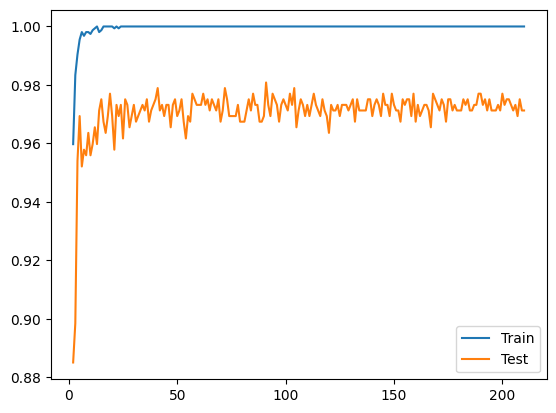

In [34]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 211)]

for i in values:
	
	modell = RandomForestClassifier( n_estimators=i)
	modell.fit(x_train_data, y_train_data)

	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f,i %.3f ' % (i, train_acc, test_acc,i))
	
 
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV


In [36]:
KNN= KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(3,71)}
KNN_model_2 = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=3)


In [37]:
KNN_Classifier_2 = KNN_model_2.fit(x_train_data, y_train_data)

Fitting 10 folds for each of 68 candidates, totalling 680 fits
[CV 1/10] END n_neighbors=3;, score=(train=0.935, test=0.854) total time=   0.0s
[CV 2/10] END n_neighbors=3;, score=(train=0.934, test=0.885) total time=   0.0s
[CV 3/10] END n_neighbors=3;, score=(train=0.933, test=0.885) total time=   0.0s
[CV 4/10] END n_neighbors=3;, score=(train=0.928, test=0.860) total time=   0.0s
[CV 5/10] END n_neighbors=3;, score=(train=0.934, test=0.873) total time=   0.0s
[CV 6/10] END n_neighbors=3;, score=(train=0.933, test=0.885) total time=   0.0s
[CV 7/10] END n_neighbors=3;, score=(train=0.935, test=0.885) total time=   0.0s
[CV 8/10] END n_neighbors=3;, score=(train=0.935, test=0.872) total time=   0.0s
[CV 9/10] END n_neighbors=3;, score=(train=0.928, test=0.917) total time=   0.0s
[CV 10/10] END n_neighbors=3;, score=(train=0.935, test=0.910) total time=   0.0s
[CV 1/10] END n_neighbors=4;, score=(train=0.930, test=0.860) total time=   0.0s
[CV 2/10] END n_neighbors=4;, score=(train=0.

In [38]:
KNN_predictions_2 = KNN_Classifier_2.predict(x_test_data)


In [39]:
print(classification_report(y_test_data, KNN_predictions_2))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       137
           1       0.79      0.83      0.81       142
           2       0.95      0.94      0.94       243

    accuracy                           0.88       522
   macro avg       0.87      0.87      0.87       522
weighted avg       0.88      0.88      0.88       522



In [40]:
print("Accuracy of scaled data:", accuracy_score(y_test_data, KNN_predictions_2))


Accuracy of scaled data: 0.8812260536398467


In [41]:
print(KNN_model_2.best_params_)

{'n_neighbors': 4}


In [42]:
modelll = KNeighborsClassifier(n_neighbors=14)
modelll.fit(x_train_data, y_train_data)	
test_yhat = modelll.predict(x_test_data)
test_acc = accuracy_score(y_test_data, test_yhat)
print("test  ",test_acc)
train_yhat = modelll.predict(x_train_data)
train_acc = accuracy_score(y_train_data, train_yhat)
print("train  ",train_acc)

test   0.8563218390804598
train   0.8792332268370607


In [43]:
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators':np.arange(50,200,10),
    'max_depth' : np.arange(10,150,10),
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap':[True, False]
}
RF_model=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True,verbose=3,n_jobs=-1)
RF_Classifier_2 = RF_model.fit(x_train_data, y_train_data) 

Fitting 3 folds for each of 3780 candidates, totalling 11340 fits


In [44]:
print(RF_model.best_params_)

{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [45]:
RF_predictions_2 = RF_Classifier_2.predict(x_test_data)


In [46]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, RF_predictions_2))


Accuracy of unscaled data: 0.975095785440613


In [47]:
from sklearn.model_selection import RandomizedSearchCV

forest = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest.fit(x_train_data, y_train_data)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, verbose=2)

In [48]:
forest.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 90,
 'bootstrap': False}

In [49]:
modell = RandomForestClassifier( bootstrap = True, max_depth= 60, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 130)
modell.fit(x_train_data, y_train_data)	
test_yhat = modell.predict(x_test_data)
test_acc = accuracy_score(y_test_data, test_yhat)
print(test_acc)
train_yhat = modell.predict(x_train_data)
train_acc = accuracy_score(y_train_data, train_yhat)
print(train_acc)
	

0.9693486590038314
0.9987220447284345


In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
NN_model_2 = MLPClassifier()


In [52]:
param_grid = { 
    'hidden_layer_sizes':(8,8,8,8),
    'activation' : ['identity','logistic','tanh','relu'],
    'solver' : ['lbfgs', 'sgd','adam'],
    'max_iter' :(np.arange(200,500,50))
   
}


In [53]:
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
 #‘sgd’ refers to stochastic gradient descent.
#‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

nn_model=GridSearchCV(estimator=NN_model_2, param_grid=param_grid, cv=4, scoring='accuracy', return_train_score=True,verbose=3,n_jobs=-1)
NN_model_2 = nn_model.fit(x_train_data, y_train_data) 

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


In [54]:
print(NN_model_2.best_params_)

{'activation': 'identity', 'hidden_layer_sizes': 8, 'max_iter': 400, 'solver': 'lbfgs'}


In [55]:
mlp_predictions_2 = NN_model_2.predict(x_test_data)



In [56]:
print("Accuracy of scaled data:", accuracy_score(y_test_data, mlp_predictions_2))

Accuracy of scaled data: 0.9904214559386973


In [57]:
classifier_2 = DecisionTreeClassifier( )
param_grid = { 
    'splitter':['best','random'],
    'max_leaf_nodes':  np.arange(2,50),
    'max_depth': np.arange(2,50)
    }
DD_model_2=GridSearchCV(estimator=classifier_2, param_grid=param_grid, cv= 5,return_train_score=True,verbose=3,n_jobs=-1)
DD_Classifier_2 = DD_model_2.fit(x_train_data, y_train_data) 

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


In [58]:
DD_Classifier_2_predictions_2 = DD_Classifier_2.predict(x_test_data)


In [59]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, DD_Classifier_2_predictions_2))

Accuracy of unscaled data: 0.9693486590038314


In [60]:
forest2 = RandomizedSearchCV(estimator = classifier_2, param_distributions = param_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest2.fit(x_train_data, y_train_data)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [61]:
forest2.best_params_

{'splitter': 'best', 'max_leaf_nodes': 48, 'max_depth': 30}

In [62]:
	modell = DecisionTreeClassifier( splitter ='random', max_leaf_nodes= 33, max_depth= 30)
	modell.fit(x_train_data, y_train_data)	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	print("test  " ,test_acc)
	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	print("train  ",train_acc)

test   0.9329501915708812
train   0.9629392971246007


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [64]:
log = LogisticRegression()
rnd = RandomForestClassifier(bootstrap = True, max_depth= 60, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 60)
svm = SVC()

In [65]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard' , weights=[1,1,1] )

In [66]:
voting.fit(x_train_data, y_train_data)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(max_depth=60,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=60)),
                             ('support_vector_machine', SVC())],
                 weights=[1, 1, 1])

In [67]:
for clf in (log, rnd, svm, voting):
    clf.fit(x_train_data, y_train_data)
    y_pred = clf.predict(x_test_data)
    print(clf.__class__.__name__, accuracy_score(y_test_data, y_pred))

LogisticRegression 0.9770114942528736
RandomForestClassifier 0.9674329501915708
SVC 0.9348659003831418
VotingClassifier 0.9731800766283525


In [68]:
LogisticRegressionModel = LogisticRegression(solver='sag',C=1.0,random_state=33,max_iter=10000)

LogisticRegressionModel_1=LogisticRegressionModel.fit(x_train_data, y_train_data)

In [69]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel_1.score(x_train_data, y_train_data))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel_1.score(x_test_data, y_test_data))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel_1.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel_1.n_iter_)
print('----------------------------------------------------')


LogisticRegressionModel Train Score is :  0.979552715654952
LogisticRegressionModel Test Score is :  0.9770114942528736
LogisticRegressionModel Classes are :  [0 1 2]
LogisticRegressionModel No. of iteratios is :  [58]
----------------------------------------------------
